In [4]:
import os
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.externals.joblib import dump, load
from skimage.feature import hog
from sklearn import metrics


In [5]:
X = []
y = []

# reduce 128 -> 64 or 32
for i in range(1, 11):
    data_folder = os.getcwd()+ f'\\digits\\Sample{f"{i}".zfill(3)}\\'
    for images in os.listdir(data_folder):
        img = cv2.imread(data_folder+images)  # load a color image into greyscale image
        img = cv2.medianBlur(img,5) # median blur to remove salt & and pepper noise
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.equalizeHist(img) # Equalize histogram
        img_resized = cv2.resize(img,(30,30))
        
        X.append(img_resized.reshape(-1,1))
        y.append(i-1)

# Shape [7705, 900, 1] => 7705 ta sample, 900(30x30) hocche pixel values
X = np.array(X)
print(X.shape)
X = X.reshape(X.shape[:2]) # just removing the singleton dimension. Now shape = [7705,900]

(7926, 900, 1)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

Accuracy of Random Forest classifier on test set: 0.99
Classification report for - 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       153
           1       0.99      0.99      0.99       140
           2       1.00      0.99      1.00       152
           3       1.00      1.00      1.00       153
           4       1.00      0.99      0.99       166
           5       1.00      1.00      1.0

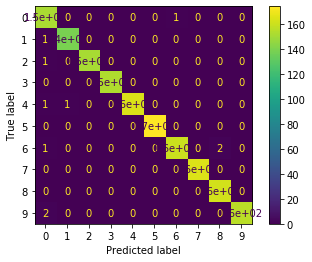

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Classification report for - \n{}:\n{}\n".format(clf, metrics.classification_report(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot() 
import joblib

#
# Create your model here (same as above)
#

# Save to file in the current working directory

joblib.dump(clf,'rf2.joblib')
print("model saved")